In [132]:
import nltk

In [133]:
import requests
import pandas as pd

url = "https://api.nhtsa.gov/complaints/complaintsByVehicle"
params = {
    "make": "jeep",
    "model": "grand_cherokee",
    "modelYear": "2012"
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()

    complaints_data = data.get('results', [])

    df = pd.DataFrame(complaints_data)

    csv_file_path = "complaints_data.csv"
    df.to_csv(csv_file_path, index=False)
    print(f"CSV file saved successfully at: {csv_file_path}")
else:
    print("Error: " + str(response.status_code))


CSV file saved successfully at: complaints_data.csv


In [134]:
complaints = pd.DataFrame(data['results'])

In [135]:
complaints.head()

,odiNumber,manufacturer,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,vin,components,summary,products
0,11562548,"Chrysler (FCA US, LLC)",False,False,0,0,12/27/2023,12/29/2023,1C4RJEAG6CC,POWER TRAIN,"The transmission shifts strangely, and it seem...","[{'type': 'Vehicle', 'productYear': '2012', 'p..."
1,11560307,"Chrysler (FCA US, LLC)",False,False,0,0,10/15/2023,12/15/2023,1C4RJFAG6CC,ELECTRICAL SYSTEM,The contact owns a 2012 Jeep Grand Cherokee. T...,"[{'type': 'Vehicle', 'productYear': '2012', 'p..."
2,11554291,"Chrysler (FCA US, LLC)",False,False,0,0,11/08/2023,11/09/2023,1C4RJFBG5CC,"SUSPENSION,POWER TRAIN,FUEL/PROPULSION SYSTEM",Estaba manejando a 35 millas y de repentes la ...,"[{'type': 'Vehicle', 'productYear': '2012', 'p..."
3,11550389,"Chrysler (FCA US, LLC)",False,False,0,0,08/01/2023,10/17/2023,1C4RJFAG6CC,ELECTRICAL SYSTEM,The contact owns a 2012 Jeep Grand Cherokee. T...,"[{'type': 'Vehicle', 'productYear': '2012', 'p..."
4,11547276,"Chrysler (FCA US, LLC)",False,False,0,0,08/14/2023,09/29/2023,1C4RJFBT1CC,UNKNOWN OR OTHER,drain water from AC leaking into cabin & flood...,"[{'type': 'Vehicle', 'productYear': '2012', 'p..."


In [136]:
complaints.columns

Index(['odiNumber', 'manufacturer', 'crash', 'fire', 'numberOfInjuries',
       'numberOfDeaths', 'dateOfIncident', 'dateComplaintFiled', 'vin',
       'components', 'summary', 'products'],
      dtype='object')

In [137]:
complaints_file = complaints['components']
speech = complaints_file

print(speech[:100])


0                                       POWER TRAIN
1                                 ELECTRICAL SYSTEM
2     SUSPENSION,POWER TRAIN,FUEL/PROPULSION SYSTEM
3                                 ELECTRICAL SYSTEM
4                                  UNKNOWN OR OTHER
                          ...                      
95                                ELECTRICAL SYSTEM
96                                 UNKNOWN OR OTHER
97                           FUEL/PROPULSION SYSTEM
98                                ELECTRICAL SYSTEM
99                                ELECTRICAL SYSTEM
Name: components, Length: 100, dtype: object


In [138]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [139]:
import nltk
from nltk.probability import FreqDist
fdist1 = FreqDist(' '.join(complaints['components']).split(' '))

fdist1.most_common(50)


[('ELECTRICAL', 754),
 ('SYSTEM', 728),
 ('BRAKES', 247),
 ('SERVICE', 204),
 ('OR', 106),
 ('ENGINE', 105),
 ('FUEL/PROPULSION', 92),
 ('POWER', 76),
 ('SYSTEM,ENGINE', 74),
 ('OTHER', 72),
 ('UNKNOWN', 69),
 ('STEERING', 50),
 ('TRAIN', 48),
 ('SYSTEM,SERVICE', 48),
 ('LIGHTING', 38),
 ('AIR', 36),
 ('SPEED', 33),
 ('CONTROL', 31),
 ('SYSTEM,', 30),
 ('SYSTEM,FUEL/PROPULSION', 29),
 ('BRAKES,', 29),
 ('FUEL', 28),
 ('ENGINE,FUEL/PROPULSION', 24),
 ('BAGS', 22),
 ('STABILITY', 22),
 ('SYSTEM,INTERIOR', 22),
 ('SYSTEM,ENGINE,FUEL/PROPULSION', 21),
 ('SYSTEM,EXTERIOR', 21),
 ('TRAIN,ELECTRICAL', 20),
 ('SYSTEM,UNKNOWN', 20),
 ('AND', 16),
 ('BRAKES,ENGINE', 16),
 ('VEHICLE', 16),
 ('STEERING,ELECTRICAL', 14),
 ('SYSTEM,ELECTRONIC', 14),
 ('HYDRAULIC,SERVICE', 14),
 ('OTHER,ENGINE', 13),
 ('GASOLINE', 13),
 ('SUSPENSION', 12),
 ('STRUCTURE', 12),
 ('STEERING,SERVICE', 11),
 ('EXTERIOR', 10),
 ('OTHER,FUEL/PROPULSION', 10),
 ('BELTS', 9),
 ('TRAIN,ENGINE', 8),
 ('SEATS', 7),
 ('GASOLINE,E

In [140]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

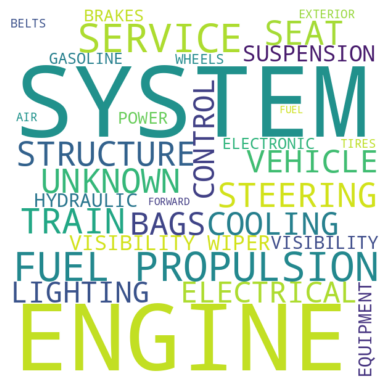

In [147]:
wc = WordCloud(min_font_size=16, max_words=300, background_color="white",width=600,height=600).generate(' '.join(fdist1))

plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

This wordcloud makes it very clear that the Engine is a glaring issue.However, with the word system being so big I think that is due to there being multiple components where the word system is used. To remedy this I am making another word cloud that breaks components up by each individual complaint instead of words.  

In [144]:
wc.to_file("wordcloud.png")

In [142]:
fdist2 = FreqDist(', '.join(complaints['components']).split(', '))

fdist2.most_common(50)

[('ELECTRICAL SYSTEM', 509),
 ('SERVICE BRAKES', 200),
 ('FUEL/PROPULSION SYSTEM', 92),
 ('ENGINE', 78),
 ('ELECTRICAL SYSTEM,ENGINE', 62),
 ('UNKNOWN OR OTHER', 54),
 ('STEERING', 50),
 ('POWER TRAIN', 40),
 ('ELECTRICAL SYSTEM,SERVICE BRAKES', 33),
 ('FUEL SYSTEM', 28),
 ('ENGINE,FUEL/PROPULSION SYSTEM', 24),
 ('ELECTRICAL SYSTEM,FUEL/PROPULSION SYSTEM', 24),
 ('AIR BAGS', 21),
 ('ELECTRICAL SYSTEM,ENGINE,FUEL/PROPULSION SYSTEM', 21),
 ('ELECTRICAL SYSTEM,INTERIOR LIGHTING', 19),
 ('HYDRAULIC,SERVICE BRAKES', 14),
 ('GASOLINE', 13),
 ('SUSPENSION', 12),
 ('STRUCTURE', 12),
 ('ELECTRICAL SYSTEM,EXTERIOR LIGHTING', 10),
 ('VEHICLE SPEED CONTROL', 9),
 ('STEERING,SERVICE BRAKES,ENGINE', 8),
 ('EXTERIOR LIGHTING', 8),
 ('SEATS', 7),
 ('POWER TRAIN,ENGINE', 7),
 ('ELECTRICAL SYSTEM,UNKNOWN OR OTHER,ENGINE', 7),
 ('ELECTRICAL SYSTEM,ELECTRONIC STABILITY CONTROL', 7),
 ('UNKNOWN OR OTHER,FUEL/PROPULSION SYSTEM', 6),
 ('POWER TRAIN,ELECTRICAL SYSTEM,ENGINE', 6),
 ('ELECTRICAL SYSTEM,UNKNOWN 

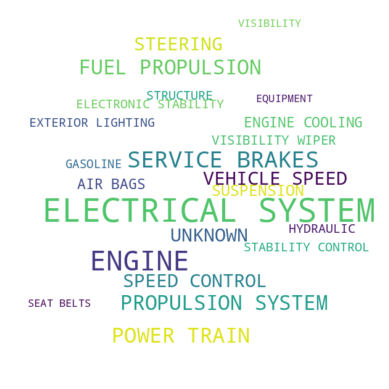

In [150]:
wc = WordCloud(min_font_size=16, max_words=300, background_color="white",width=600,height=600).generate(','.join(fdist2))

plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

This wordcloud is better because it shows the full complaint component rather than just individual words. It seems as though the electrical system is the primary cause of complaints followed by the engine. This is the car I have and can confirm the issues with the electrical system.

In [145]:
wc.to_file("wordcloud1.png")